In [6]:
import pandas as pd

df = pd.read_csv("../../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [7]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Divide the data between train and test data

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

Naive Bayesian Classifier Model

Accuracy: 0.705072320190212
Recall: 0.6072386058981233
F1 Score: 0.6805451228672604


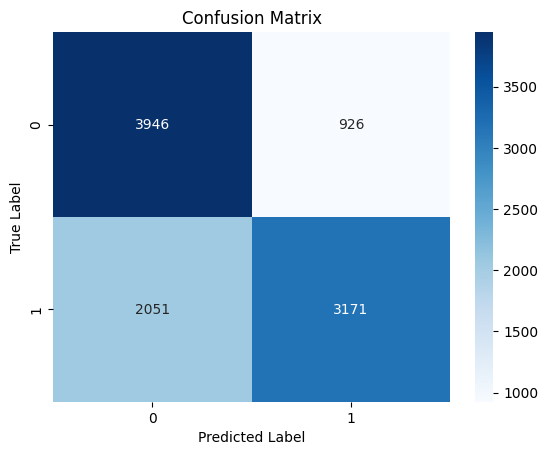

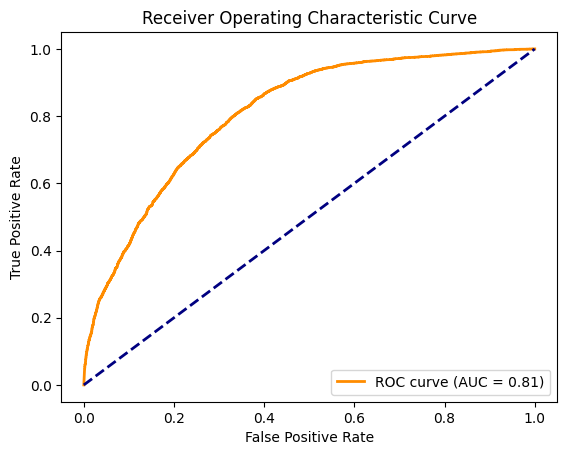

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Fit the model on the training data
naive_bayes_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_model.predict(x_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, naive_bayes_model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.7437091341390926
Recall: 0.7160091918805056
F1 Score: 0.7429706905116742


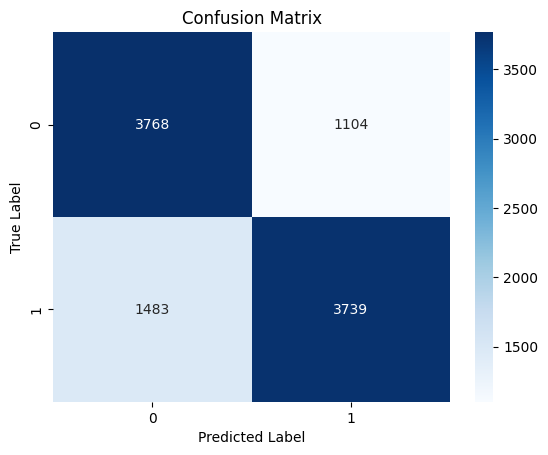

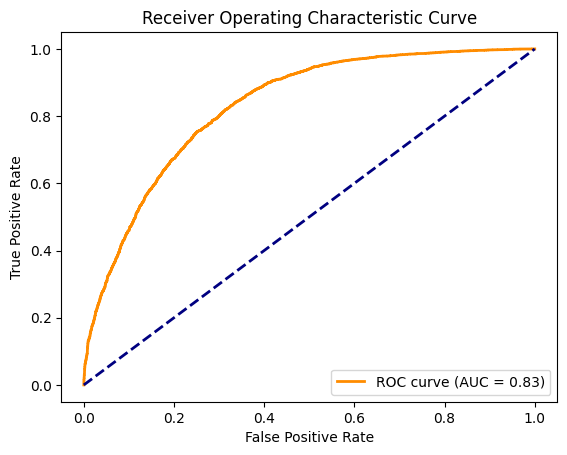

In [14]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize the Categorical Naive Bayes model
cat_naive_bayes_model = CategoricalNB()

# Fit the model on the training data
cat_naive_bayes_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = cat_naive_bayes_model.predict(x_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, cat_naive_bayes_model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()
